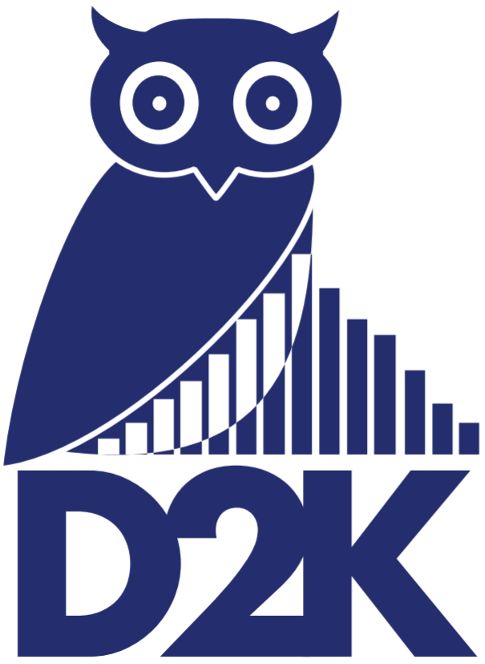 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 2 ###

## Pandas basics ##
["Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."](https://pandas.pydata.org/)

First, let's introduce the three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

In [2]:
### standard imports
import numpy as np
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

To construct a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values. The index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [9]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [11]:
data[5]

0.5

### The Pandas Index Object

We have seen here that the ``Series`` object contains an explicit *index* that lets you reference and modify data. This ``Index`` object is an interesting structure in itself. As a simple example, let's construct an ``Index`` from a list of integers:

In [12]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [13]:
ind[1]

3

In [14]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [15]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [16]:
# this returns an error
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``. If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
You can think of a ``DataFrame`` as data table or spreadsheet with rows and columns, or as a sequence of aligned ``Series`` objects that share the same index.

In [ ]:
state_index = pd.Index(['California','Texas','New York','Florida','Illinois'])

In [ ]:
state_area = pd.Series([423967, 695662, 141297, 170312, 149995],
                 index = state_index)
state_area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [ ]:
state_pop = pd.Series([38332521, 26448193, 19651127, 19552860, 12882135],
                 index = state_index)
state_pop

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
state_df = pd.DataFrame({"area": state_area, "population": state_pop})
state_df

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
state_df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

#### Read in Data Sources

Most of the time, you will not need to specify a dataframe by typing out all the data, instead you can read data from outside sources and save them as a datafame. 

Pandas has a number of very useful file reading tools. Most common one: pd.read_csv. 

In [26]:
# read in a csv file saved in the same folder as your ipynb file
# if your csv file is somewhere else, need to include file path
# for example: pd.read_csv("/Users/user_name/data_folder/data_file.csv")
elections = pd.read_csv("elections.csv")
elections 

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [ ]:
# this pulls up a simple documentation of the function/method
?pd.read_csv

Read a table from a website

[padas.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): Read HTML tables into a list of DataFrame objects.

In [24]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/Greenhouse_gas")
dfs[2]  # read the 5th table on the page, why 5th?

,Gas,Pre-1750 tropospheric concentration[68],Recent tropospheric concentration[69],Absolute increase since 1750,Percentage increase since 1750,Increased radiative forcing (W/m2)[70]
0,Carbon dioxide (CO2),280 ppm[71],411 ppm[72],131 ppm,47%,2.05[73]
1,Methane (CH 4),700 ppb[74],1893 ppb /[75][76] 1762 ppb[75],1193 ppb / 1062 ppb,170.4% / 151.7%,0.49
2,Nitrous oxide (N 2O),270 ppb[70][77],326 ppb /[75] 324 ppb[75],56 ppb / 54 ppb,20.7% / 20.0%,0.17
3,Tropospheric ozone (O 3),237 ppb[68],337 ppb[68],100 ppb,42%,0.4[78]


More in Pandas documentation: 

[padas.read_everything](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

[padas.DataFrame.method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

#### Looking at only a few rows

We can use the head command to return only a few rows of a dataframe.

In [27]:
# default return first 5 rows of your dataframe
elections.head(10)

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [28]:
elections.head(3)

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss


There is also a tail command.

In [29]:
# return the last 7 rows
elections.tail(7)

,Candidate,Party,%,Year,Result
18,McCain,Republican,45.7,2008,loss
19,Obama,Democratic,51.1,2012,win
20,Romney,Republican,47.2,2012,loss
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win
23,Biden,Democratic,51.3,2020,win
24,Trump,Republican,46.9,2020,loss


`df.sample` randomly sample a subset of rows WITHOUT replacement. Here's a random sample of 5 rows. Remember what is a simple random sample?

In [32]:
# Note I am seeding the sample so you can reproduce my results
# My favorite random seed is 7
elec_sample = elections.sample(5, random_state=7) 
elec_sample

,Candidate,Party,%,Year,Result
1,Carter,Democratic,41.0,1980,loss
5,Bush,Republican,53.4,1988,win
11,Dole,Republican,40.7,1996,loss
13,Gore,Democratic,48.4,2000,loss
2,Anderson,Independent,6.6,1980,loss


Sampling with replacement

In [33]:
# if I don't set the random seed, you get differnt samples
# sample with replacement is also important, more on this later
elections.sample(10, replace=True) 

,Candidate,Party,%,Year,Result
11,Dole,Republican,40.7,1996,loss
0,Reagan,Republican,50.7,1980,win
5,Bush,Republican,53.4,1988,win
14,Bush,Republican,47.9,2000,win
11,Dole,Republican,40.7,1996,loss
4,Mondale,Democratic,37.6,1984,loss
10,Clinton,Democratic,49.2,1996,win
17,Obama,Democratic,52.9,2008,win
11,Dole,Republican,40.7,1996,loss
9,Perot,Independent,18.9,1992,loss


Sampling columns?

In [36]:
# you can also random sample columns, but not very useful
# axis=1 means columns instead of rows, 
# 2 is how many columns I want to sample
elections.sample(2, axis=1).head() 

,%,Year
0,50.7,1980
1,41.0,1980
2,6.6,1980
3,58.8,1984
4,37.6,1984


#### Dataframe Utility Operations

In addition to `head`, `tail`, and `sample` the are a range of useful operations.

In [37]:
# df.columns return all column names
elections.columns

Index(['Candidate', 'Party', '%', 'Year', 'Result'], dtype='object')

The columns have data types.

In [38]:
# df.dtypes return data types for each column
elections.dtypes

Candidate     object
Party         object
%            float64
Year           int64
Result        object
dtype: object

Casting types. This changes the Year varaible from integer to float.

In [39]:
# df.astype for casting types
elections.astype({"Year": float}).head()

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980.0,win
1,Carter,Democratic,41.0,1980.0,loss
2,Anderson,Independent,6.6,1980.0,loss
3,Reagan,Republican,58.8,1984.0,win
4,Mondale,Democratic,37.6,1984.0,loss


You can access the rows as an array of lists

In [40]:
# strips away column names and row index
elections.values

array([['Reagan', 'Republican', 50.7, 1980, 'win'],
       ['Carter', 'Democratic', 41.0, 1980, 'loss'],
       ['Anderson', 'Independent', 6.6, 1980, 'loss'],
       ['Reagan', 'Republican', 58.8, 1984, 'win'],
       ['Mondale', 'Democratic', 37.6, 1984, 'loss'],
       ['Bush', 'Republican', 53.4, 1988, 'win'],
       ['Dukakis', 'Democratic', 45.6, 1988, 'loss'],
       ['Clinton', 'Democratic', 43.0, 1992, 'win'],
       ['Bush', 'Republican', 37.4, 1992, 'loss'],
       ['Perot', 'Independent', 18.9, 1992, 'loss'],
       ['Clinton', 'Democratic', 49.2, 1996, 'win'],
       ['Dole', 'Republican', 40.7, 1996, 'loss'],
       ['Perot', 'Independent', 8.4, 1996, 'loss'],
       ['Gore', 'Democratic', 48.4, 2000, 'loss'],
       ['Bush', 'Republican', 47.9, 2000, 'win'],
       ['Kerry', 'Democratic', 48.3, 2004, 'loss'],
       ['Bush', 'Republican', 50.7, 2004, 'win'],
       ['Obama', 'Democratic', 52.9, 2008, 'win'],
       ['McCain', 'Republican', 45.7, 2008, 'loss'],
       ['O

Shape returns the number of rows and columns.

In [41]:
# df.shape returns number of rows and columns
elections.shape

(25, 5)

Size describes the number of "cells" in the dataframe

In [42]:
# df.size return total number of "cells": number of rows timws number of columns
elections.size

125

We can rename columns:

`df.rename(columns={"column_name_old": "column_name_new"})`

In [44]:
# df.rename syntax need to input a dictionary 
elections.rename(columns={"%": "Percent"})
elections.head()

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


**Note** that the `rename` method returned a new dataframe and didn't modify the original one. This means it is not mutating. If you need to have the change in the original dataframe, you can give this new dataframe the original name, or do `inplace=True`. 

**Most operations in Pandas are not mutating.** This produces cleaner code.  If you change something it should be stored in a new appropriately named variable.  

#### Counting unique values in a series

Series also has a very useful function `.value_counts()` which allows us to compute the number of occurences of each unique value.

In [45]:
party_counts = elections['Party'].value_counts()
party_counts

Republican     11
Democratic     11
Independent     3
Name: Party, dtype: int64

In [46]:
# this is still a series
type(party_counts)

pandas.core.series.Series

Note that in each case we also got back a series and these series (like all series) are maps from index to value.

In [47]:
party_counts.index

Index(['Republican', 'Democratic', 'Independent'], dtype='object')

In [48]:
party_counts.values

array([11, 11,  3], dtype=int64)

In [49]:
party_counts["Independent"]

3

#### Dataframe Selecting Rows and Columns

In [50]:
# select column by column names, this returns a series
elections["Candidate"]

0       Reagan
1       Carter
2     Anderson
3       Reagan
4      Mondale
5         Bush
6      Dukakis
7      Clinton
8         Bush
9        Perot
10     Clinton
11        Dole
12       Perot
13        Gore
14        Bush
15       Kerry
16        Bush
17       Obama
18      McCain
19       Obama
20      Romney
21     Clinton
22       Trump
23       Biden
24       Trump
Name: Candidate, dtype: object

In [51]:
# select multiple columns, put column names in a list [col1, col2, ...]
# this returns a dataframe
elections[["Candidate", "Party"]]

,Candidate,Party
0,Reagan,Republican
1,Carter,Democratic
2,Anderson,Independent
3,Reagan,Republican
4,Mondale,Democratic
5,Bush,Republican
6,Dukakis,Democratic
7,Clinton,Democratic
8,Bush,Republican
9,Perot,Independent


In [52]:
# this returns a dataframe!
elections[["Candidate"]]

,Candidate
0,Reagan
1,Carter
2,Anderson
3,Reagan
4,Mondale
5,Bush
6,Dukakis
7,Clinton
8,Bush
9,Perot


If you pass a single item instead of a list you get back a `Series`

In [53]:
party = elections["Party"]
party

0      Republican
1      Democratic
2     Independent
3      Republican
4      Democratic
5      Republican
6      Democratic
7      Democratic
8      Republican
9     Independent
10     Democratic
11     Republican
12    Independent
13     Democratic
14     Republican
15     Democratic
16     Republican
17     Democratic
18     Republican
19     Democratic
20     Republican
21     Democratic
22     Republican
23     Democratic
24     Republican
Name: Party, dtype: object

When accessing a single column we get back a `pd.Series` object

In [54]:
type(party)

pandas.core.series.Series

The series object represents a single column (or row) of data.  The `Series` object has a `index`, a `name`, and `values`.  A series can be thought of as a map.

In [55]:
party.index

RangeIndex(start=0, stop=25, step=1)

In [56]:
party.name

'Party'

In [57]:
party.values

array(['Republican', 'Democratic', 'Independent', 'Republican',
       'Democratic', 'Republican', 'Democratic', 'Democratic',
       'Republican', 'Independent', 'Democratic', 'Republican',
       'Independent', 'Democratic', 'Republican', 'Democratic',
       'Republican', 'Democratic', 'Republican', 'Democratic',
       'Republican', 'Democratic', 'Republican', 'Democratic',
       'Republican'], dtype=object)

We can convert a Series into a DataFrame

In [58]:
party.to_frame()

,Party
0,Republican
1,Democratic
2,Independent
3,Republican
4,Democratic
5,Republican
6,Democratic
7,Democratic
8,Republican
9,Independent


In [59]:
# select rows by row index
elections[:5]

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


In [60]:
elections[4:10]

,Candidate,Party,%,Year,Result
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [61]:
elections[20:]

,Candidate,Party,%,Year,Result
20,Romney,Republican,47.2,2012,loss
21,Clinton,Democratic,48.2,2016,loss
22,Trump,Republican,46.1,2016,win
23,Biden,Democratic,51.3,2020,win
24,Trump,Republican,46.9,2020,loss


In [62]:
# Select the row and column at the same time.
elections[["Candidate"]][:3]

,Candidate
0,Reagan
1,Carter
2,Anderson


In [63]:
# the same functionality
elections[:3][["Candidate"]]

,Candidate
0,Reagan
1,Carter
2,Anderson


In [64]:
# subset by Boolean, filtering!
elec_dem = elections[elections["Party"] == "Democratic"]
elec_dem.head()

,Candidate,Party,%,Year,Result
1,Carter,Democratic,41.0,1980,loss
4,Mondale,Democratic,37.6,1984,loss
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win


In [65]:
# returns a DataFrame with Democratic winning election
elections[
    (elections["Party"] == "Democratic") & 
    (elections["Result"] == "win")]

,Candidate,Party,%,Year,Result
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win
17,Obama,Democratic,52.9,2008,win
19,Obama,Democratic,51.1,2012,win
23,Biden,Democratic,51.3,2020,win


In [66]:
# winning with voting percentage smaller than 50%
elections[
    (elections['Result'] == 'win') & 
    (elections['%'] < 50)
]

,Candidate,Party,%,Year,Result
7,Clinton,Democratic,43.0,1992,win
10,Clinton,Democratic,49.2,1996,win
14,Bush,Republican,47.9,2000,win
22,Trump,Republican,46.1,2016,win


Using the logical negation `~` operator (not).  

In [67]:
# winning with voting percentage greater than or equal to 50%
elections[
    (elections['Result'] == 'win') & 
    ~(elections['%'] < 50)
]

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
3,Reagan,Republican,58.8,1984,win
5,Bush,Republican,53.4,1988,win
16,Bush,Republican,50.7,2004,win
17,Obama,Democratic,52.9,2008,win
19,Obama,Democratic,51.1,2012,win
23,Biden,Democratic,51.3,2020,win


The | operator is the symbol for or.

In [68]:
# not (Dem or Rep) = (not Dem) and (not Rep)
elections[
    ~((elections['Party'] == "Democratic") | 
        (elections['Party'] == "Republican"))
]

,Candidate,Party,%,Year,Result
2,Anderson,Independent,6.6,1980,loss
9,Perot,Independent,18.9,1992,loss
12,Perot,Independent,8.4,1996,loss


If we have multiple conditions (say Republican or Democratic), we can use the isin operator to simplify our code.

In [79]:
# isin here is same as Dem or Rep
# elections[elections['Party'].isin(["Republican", "Democratic"])]\
elections[elections['Party'].isin(["Independent"])]

,Candidate,Party,%,Year,Result
2,Anderson,Independent,6.6,1980,loss
9,Perot,Independent,18.9,1992,loss
12,Perot,Independent,8.4,1996,loss


#### Column Assignment (Mutating)

You can modify and even add columns using the square brackets `[ ]` 

In [80]:
elections["Year"] = elections["Year"] * -1
elections

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,-1980,win
1,Carter,Democratic,41.0,-1980,loss
2,Anderson,Independent,6.6,-1980,loss
3,Reagan,Republican,58.8,-1984,win
4,Mondale,Democratic,37.6,-1984,loss
5,Bush,Republican,53.4,-1988,win
6,Dukakis,Democratic,45.6,-1988,loss
7,Clinton,Democratic,43.0,-1992,win
8,Bush,Republican,37.4,-1992,loss
9,Perot,Independent,18.9,-1992,loss


Adding a new column by assignment:

In [81]:
elections["Corrected Year"] = elections["Year"] * -1
elections

,Candidate,Party,%,Year,Result,Corrected Year
0,Reagan,Republican,50.7,-1980,win,1980
1,Carter,Democratic,41.0,-1980,loss,1980
2,Anderson,Independent,6.6,-1980,loss,1980
3,Reagan,Republican,58.8,-1984,win,1984
4,Mondale,Democratic,37.6,-1984,loss,1984
5,Bush,Republican,53.4,-1988,win,1988
6,Dukakis,Democratic,45.6,-1988,loss,1988
7,Clinton,Democratic,43.0,-1992,win,1992
8,Bush,Republican,37.4,-1992,loss,1992
9,Perot,Independent,18.9,-1992,loss,1992


In [82]:
?np.random.randn

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    I

remember what does `df.shape[0]` return?

In [83]:
# what is elections.shape[0]?
elections["Random Numbers"] = np.random.randn(elections.shape[0])
elections

,Candidate,Party,%,Year,Result,Corrected Year,Random Numbers
0,Reagan,Republican,50.7,-1980,win,1980,1.248435
1,Carter,Democratic,41.0,-1980,loss,1980,0.833959
2,Anderson,Independent,6.6,-1980,loss,1980,0.599158
3,Reagan,Republican,58.8,-1984,win,1984,0.976128
4,Mondale,Democratic,37.6,-1984,loss,1984,0.541121
5,Bush,Republican,53.4,-1988,win,1988,-1.355027
6,Dukakis,Democratic,45.6,-1988,loss,1988,-0.077358
7,Clinton,Democratic,43.0,-1992,win,1992,0.129205
8,Bush,Republican,37.4,-1992,loss,1992,1.190926
9,Perot,Independent,18.9,-1992,loss,1992,-0.887562


In [84]:
# The statistics for the columns
# notice it only computes columns with numerical values
elections.mean()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12876\390305531.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  elections.mean()


%                   43.040000
Year             -1998.720000
Corrected Year    1998.720000
Random Numbers       0.117997
dtype: float64

In [85]:
elec_num = elections[["%", "Random Numbers"]]
elec_num.median()

%                 47.200000
Random Numbers     0.129205
dtype: float64

In [86]:
elec_num.max()

%                 58.800000
Random Numbers     1.897258
dtype: float64

In [87]:
elec_num.min()

%                 6.600000
Random Numbers   -3.082011
dtype: float64

In [88]:
elec_num.std()

%                 13.046136
Random Numbers     1.062085
dtype: float64

In [90]:
# We could also calculate the statistics for a specific colum
elections["Random Numbers"].mean()

0.11799656779464517

In [91]:
elections["Random Numbers"].var()

1.128023970381456

This is just a very brief intruduction to Pandas. For more resources:
- [10 min to Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html#min)
- [Pandas cookbook](https://pandas.pydata.org/pandas-docs/version/0.15/cookbook.html#cookbook)
- [Pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Please write your code with appropriate comments and informative names. Feel free to insert more cells as you see necessary. 

**Question 1**: The file `imdb.csv` contains a table of information about the 250 highest-rated movies on IMDb.  Load it as a dataframe called `imdb`.

In [ ]:
imdb = ...
imdb

**Question 2**:
Compute the average rating of movies from the 1940s.

*Hint:* The function `np.average` or `np.mean` can compute the average of an array of numbers.

In [ ]:
forties = ...
forties

In [ ]:
average_rating_in_forties = ...
average_rating_in_forties

**Question 3**:
Create a dataframe called `ninety_nine` containing the movies that came out in the year 1999.

In [ ]:
ninety_nine = ...
ninety_nine

**Question 4**:
Using Boolean filtering to find all the movies with a rating higher than 8.5. Assign this filtered table to the name `really_highly_rated`.

In [ ]:
really_highly_rated = ...
really_highly_rated

**Question 5**:
Find the average rating for movies released before the year 2000 and the average rating for movies released in the year 2000 or after for the movies in `imdb`.

*Hint*: Think of the steps you need to do (take the average, find the ratings, find movies released in 20th/21st centuries), and try to put them in an order that makes sense.

In [ ]:
avg_rating_in_20th_century = ...
avg_rating_in_21st_century = ...
print("Average rating in 20th century:", avg_rating_in_20th_century)
print("Average rating in 21st century:", avg_rating_in_21st_century)

**Question 6**:
Here's a challenge: Find the number of movies that came out in *even* years.

*Hint:* The operator `%` computes the remainder when dividing by a number.  So `5 % 2` is 1 and `6 % 2` is 0.  A number is even if the remainder is 0 when you divide by 2.

*Hint 2:* `%` can be used on arrays, operating elementwise like `+` or `*`.  So `make_array(5, 6, 7) % 2` is `array([1, 0, 1])`.

In [ ]:
num_even_year_movies = ...
num_even_year_movies

**Question 7**:
Calculate the mean, median and standard deviation of the ratings for the 250 movies.

*Hint:* You can use numpy function `np.mean`, `np.median` and `np.std`. 

In [ ]:
rating_mean = ...
rating_median = ...
rating_sd = ...
print({"mean": rating_mean, "median": rating_median, "standard deviation": rating_sd})

**Question 8**:
Creat a random sample of 50 movies (sample without replacement).

In [ ]:
imdb_sample = ...
imdb_sample

**Question 9**:
Calculate the same statistics of the rating: mean, median and sd for the random sample. 

In [ ]:
sample_mean = ...
sample_median = ...
sample_sd = ...
print({"sample mean": sample_mean, "sample median": sample_median, "sample sd": sample_sd})

**Question 10**:
Repeat the process in Question 8 and 9 a 1000 times, and save the results in 3 lists: `sample_mean_list`, `sample_median_list` and `sample_sd_list`. Then run the following code to visualize the sampling distribution of those statistics and compare to the population values.

In [ ]:
sample_mean_list = []
sample_median_list = []
sample_sd_list = []

rep = 1000
for i in range(1000):
    imdb_sample = ...
    sample_mean = ...
    sample_median = ...
    sample_sd = ...
    sample_mean_list = np.append(sample_mean_list, sample_mean)
    sample_median_list = np.append(sample_median_list, sample_median)
    sample_sd_list = np.append(sample_sd_list, sample_sd)

In [ ]:
plt.hist(sample_mean_list, bins=20, alpha=0.4)
plt.scatter(rating_mean, 5, color='red', s=50)
plt.title("sample mean and population mean");

In [ ]:
plt.hist(sample_median_list, bins=20, alpha=0.4)
plt.scatter(rating_median, 5, color='red', s=50)
plt.title("sample median and population median");

In [ ]:
plt.hist(sample_sd_list, bins=20, alpha=0.4)
plt.scatter(rating_sd, 5, color='red', s=50)
plt.title("sample sd and population sd");

**Question 11**: 
Here are some common random variables (distributions) with their mean and variance listed. Pick one distribution and derive the mean and the variance. You can look up the PMF or PDF for these distributions! 

$$
\begin{array}{lll}
\text{Random Variable / Distribution} & \text{Mean} & \text{Variance}           \\
\hline
\text{Bernoulli}(p)          & p             & p(1-p)         \\
\text{Binomial}(n, p)        & np            & np(1-p)        \\
\text{Poisson}(\lambda)      & \lambda       & \lambda        \\
\text{Uniform}(a, b)         & (a + b) / 2   & (b - a)^2 / 12 \\
\text{Normal}(\mu, \sigma^2) & \mu           & \sigma^2       \\
\text{Exponential}(\beta)    & \beta         & \beta^2        \\
\text{Gamma}(\alpha, \beta)  & \alpha \beta  & \alpha \beta^2 \\
\text{Beta}(\alpha, \beta)   & \alpha / (\alpha + \beta) & \alpha \beta / ((\alpha + \beta)^2 (\alpha + \beta + 1)) \\
\end{array}
$$

**Solution**:

**Question 12**: If $X_1, X_2, \cdots X_n$ are IID (independent and identically distributed) from a distribution with mean $\mu$ and variance $\sigma^2$. Calculate the mean and variance for the sample mean $\bar{X}_n = \sum_{i=1}^n X_i/ n$.

**Solution**: 

**Question 13**: Let $X \sim \text{Uniform}(0, 1)$.  Let $0 < a < b < 1$.  Let

$$
Y = \begin{cases}
1 &\text{if } 0 < x < b \\
0 &\text{otherwise}
\end{cases}
$$

and let

$$
Z = \begin{cases}
1 &\text{if } a < x < 1 \\
0 &\text{otherwise}
\end{cases}
$$

- Are $Y$ and $Z$ independent?  Why or Why not?
- Find $\mathbb{P}(Y | Z)$, then use this conditional distribution to find $\mathbb{E}(Y | Z)$.  

**Solution**:

**Question 14**: Suppose we generate a random variable $X$ in the following way:
- First we flip a fair coin. 
- If the coin is heads, take $X$ to have a $\text{Uniform}(0, 1)$ distribution.  
- If the coin is tails, take $X$ to have a $\text{Uniform}(3, 4)$ distribution.

Find $\mathbb{E}(X)$: the expectation of $X$.

**Solution**:

**Question 15**: Let $Y_1, Y_2, \dots$ be independent random variables such that $\mathbb{P}(Y_i = 1) = \mathbb{P}(Y_i = -1) = 1/2$.  Let $X_n = \sum_{i=1}^n Y_i$.  Think of $Y_i = 1$ as "the stock price increased by one dollar" $Y_i = -1$ as "the stock price decreased by one dollar" and $X_n$ as the value of the stock on day $n$.

Find 
-  $\mathbb{E}(X_n)$: the expectation of $X_n$ 
- $\mathbb{V}(X_n)$: the variance of $X_n$.

**Solution**:

**Just for Fun: Simulating the Stock Market**  
Simulate $X_n$ and plot $X_n$ versus $n$ for $n = 1, 2, \dots, 1,000$.  Repeat the whole simulation several times.  

In [ ]:
# total number of days N
N = 1000
# how many times to repeat the simulation
B = 10

# the shape of Y should be (20, 1000)
Y = 2 * np.random.binomial(n=1, p=1/2, size=(B, N)) - 1

# np.cumsum can calculate X_n = sum_{i=1}^n Y_i
# the shape of X is the same of Y
# X is the observed daily price for B stocks for N days
X = np.cumsum(Y, axis=1)

In [ ]:
# define the days as a numpy array
t = np.arange(1, N + 1)

# specify the figure size 
plt.figure(figsize=(12, 8))

# 1.96 is a magic number
z = 1.96
# the following 3 lines created a shaded range to predict
# the price change of the stock: the 95% confidence interval
plt.plot(t, z * np.sqrt(t), color='red')
plt.plot(t, -z * np.sqrt(t), color='red')
plt.fill_between(t, z * np.sqrt(t), -z * np.sqrt(t), color='red', alpha=0.1)

# plot each of stock price trajectory simulated
for b in range(B):
    plt.plot(t, X[b])

plt.title("Simulated Daily Stock Prices")
plt.xlabel("Number of Days")
plt.ylabel("Price change in $")
plt.show()

Notice that each simulation price looks very different even though they were generated the same way. Also notice that the predicted price change range (red shaded area) gets wider and wider as number of days increases. What does that mean? How does the calculations of the expectation and variance explain this?

You're done with HW 2!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing LASTNAME with your last name,
* **Upload** your file to the course website.